In [106]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [107]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [108]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [109]:
customer_df.shape

(9134, 24)

In [110]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [111]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [112]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [113]:
customer_df.columns = [val.lower().replace(" ","_") for val in customer_df.columns]

In [114]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [115]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors = 'coerce')

In [116]:
customer_df['effective_to_date'].head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

In [117]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [118]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [119]:
numeric_data = customer_df.select_dtypes(include=[np.number])
categorical_data = customer_df.select_dtypes(exclude=[np.number])

In [120]:
numeric_data['number_of_open_complaints'].value_counts().unique

<bound method Series.unique of 0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64>

In [121]:
categorical_data['number_of_open_complaints'] = numeric_data['number_of_open_complaints'].astype(object)

In [122]:
numeric_data = numeric_data.drop(['number_of_open_complaints'], axis=1)

In [123]:
categorical_data['number_of_open_complaints'].dtype

dtype('O')

In [124]:
#numeric_data['number_of_policies'].value_counts().unique

In [125]:
#categorical_data['number_of_policies'] = numeric_data['number_of_policies'].astype(object)

In [126]:
#numeric_data = numeric_data.drop(['number_of_policies'], axis=1)

In [127]:
categorical_data.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,number_of_open_complaints
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0


In [128]:
for val in categorical_data.columns:
    print(categorical_data[val].unique())

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['2011-02-24T00:00:00.000000000' '2011-01-31T00:00:00.000000000'
 '2011-02-19T00:00:00.000000000' '2011-01-20T00:00:00.000000000'
 '2011-02-03T00:00:00.000000000' '2011-01-25T00:00:00.000000000'
 '2011-01-18T00:00:00.000000000' '2011-01-26T00:00:00.000000000'
 '2011-02-17T00:00:00.000000000' '2011-02-21T00:00:00.000000000'
 '2011-01-06T00:00:00.000000000' '2011-02-06T00:00:00.000000000'
 '2011-01-10T00:00:00.000000000' '2011-01-17T00:00:00.000000000'
 '2011-01-05T00:00:00.000000000' '2011-02-27T00:00:00.000000000'
 '2011-01-14T00:00:00.000000000' '2011-01-21T00:00:00.000000000'
 '2011-02-05T00:00:00.000000000' '2011-01-29T00:00:00.000000000'
 '2011-02-28T00:00:00.000000000' '2011-02-12T00:00:00.000000000'
 '2011-02-02T00:00:00.000000000' '2011-02-07T00:00:00.0

In [129]:
numeric_data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,1,384.811147
1,6979.535903,0,94,13,42,8,1131.464935
2,12887.431650,48767,108,18,38,2,566.472247
3,7645.861827,0,106,18,65,7,529.881344
4,2813.692575,43836,73,12,44,1,138.130879


In [130]:
categorical_data.drop(['customer'], axis=1)

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,number_of_open_complaints
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,0
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,0
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,3
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,0


In [131]:
numeric_data.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [132]:
#discrete_data.head()

In [133]:
#discrete_data.drop(['A'], axis=1)

In [134]:
numeric_data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,1,384.811147
1,6979.535903,0,94,13,42,8,1131.464935
2,12887.431650,48767,108,18,38,2,566.472247
3,7645.861827,0,106,18,65,7,529.881344
4,2813.692575,43836,73,12,44,1,138.130879


In [135]:
numeric_data.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [136]:
def my_discrete_data(data):
    discrete_data = pd.DataFrame({'A': []})
    for val in data.columns:
        if (data[val].dtypes == 'int64'):
                discrete_data[val] = data[val]
                data.drop([val],axis = 1)
    discrete_data.drop(['A'],axis = 1)
    return discrete_data

print(my_discrete_data(numeric_data))



       A  income  monthly_premium_auto  months_since_last_claim  \
0    NaN   56274                    69                       32   
1    NaN       0                    94                       13   
2    NaN   48767                   108                       18   
3    NaN       0                   106                       18   
4    NaN   43836                    73                       12   
...   ..     ...                   ...                      ...   
9129 NaN   71941                    73                       18   
9130 NaN   21604                    79                       14   
9131 NaN       0                    85                        9   
9132 NaN   21941                    96                       34   
9133 NaN       0                    77                        3   

      months_since_policy_inception  number_of_policies  
0                                 5                   1  
1                                42                   8  
2                    

In [137]:
numeric_data.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [138]:
numeric_data['income'].value_counts().unique()

array([2317,   12,    7,    6,    3,    2,    1])

## Lab 4.2 - Categorical Data

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [140]:
# Q 3) we don`t drop any numerical features because the variables are not highly correlated

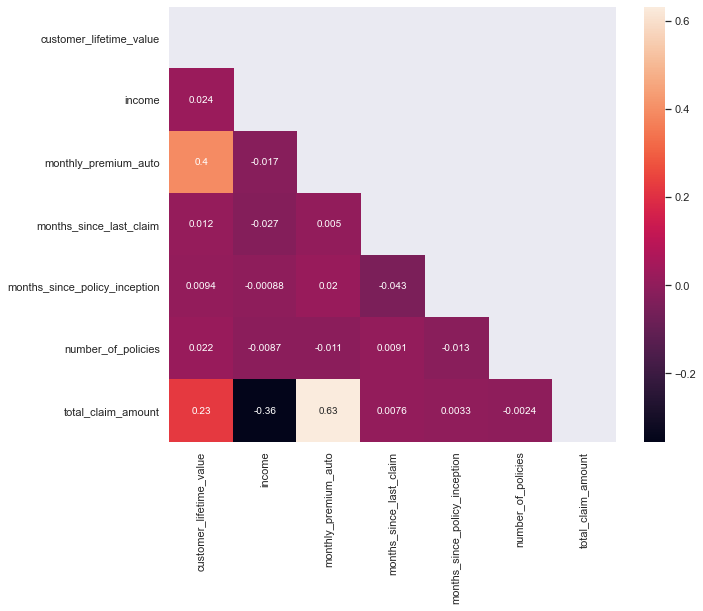

In [141]:
correlations_matrix = numeric_data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)

plt.show()

In [142]:
# tips from lesson for categorical features: apply heatmap here - how much are cat features related. Result no strong correlation

In [143]:
#plt.figure(figsize = (20,15))
#sns.heatmap(categorical_data.corr(), annot = True)

In [144]:
# tips from lesson: use bar charts here

In [145]:
#def df_bar(df):
#    sns.set(rc={'figure.figsize' = (16,8)})
#
#    for i, col in enumerate(df):
#        plt.figure(i)
#        sns.barplot

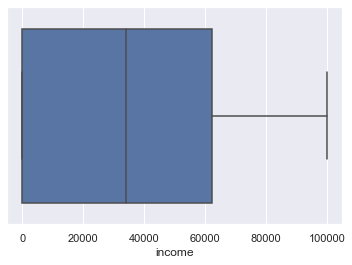

In [146]:
sns.boxplot(x = numeric_data['income'])
plt.show()

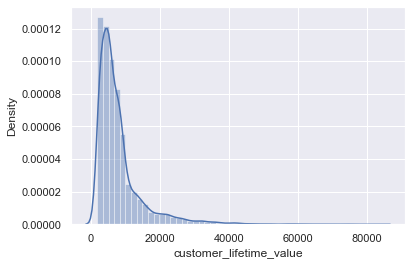

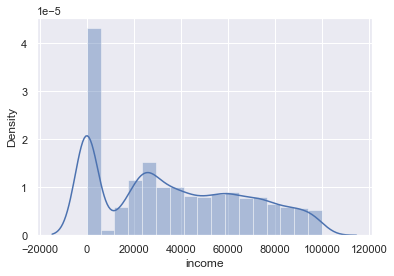

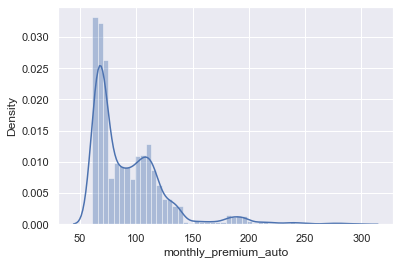

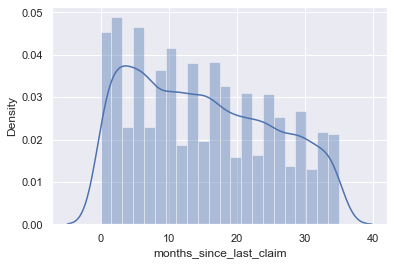

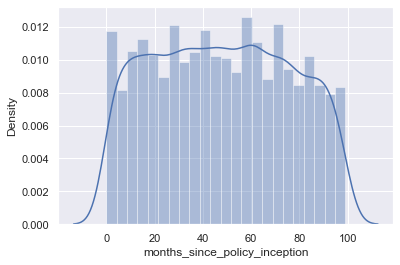

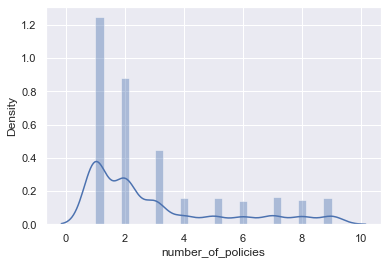

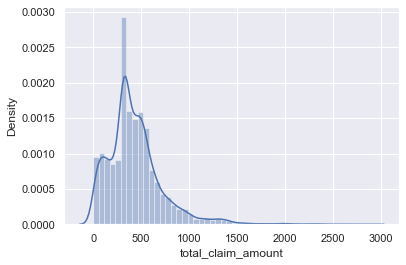

In [147]:
for val in numeric_data.columns:
    sns.distplot(numeric_data[val])
    plt.show()

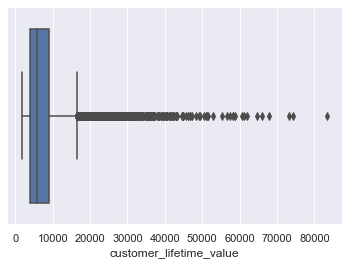

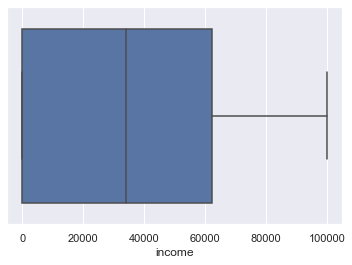

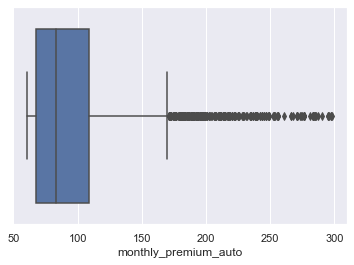

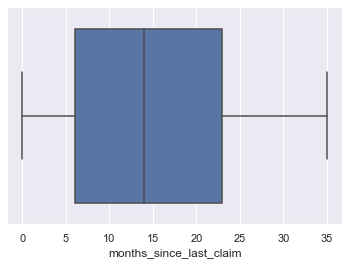

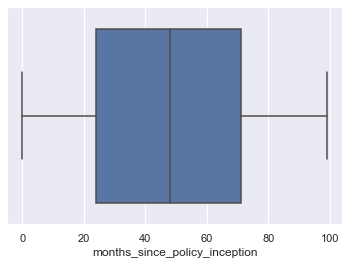

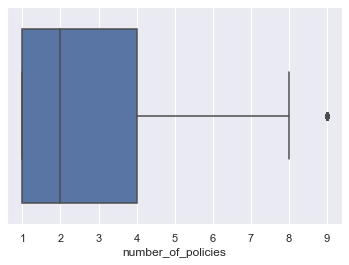

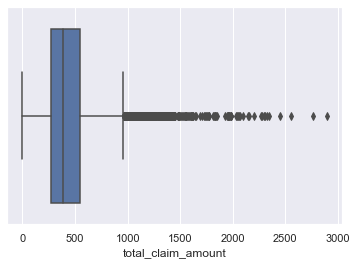

In [148]:
for val in numeric_data.columns:
    sns.boxplot(numeric_data[val])
    plt.show()

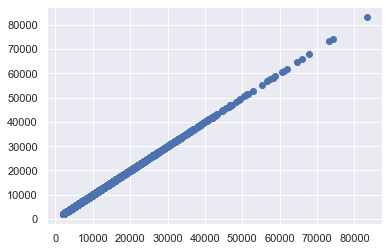

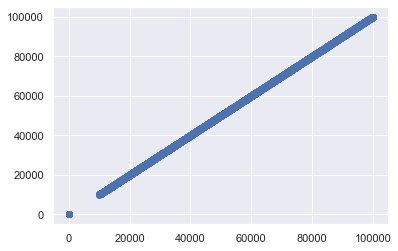

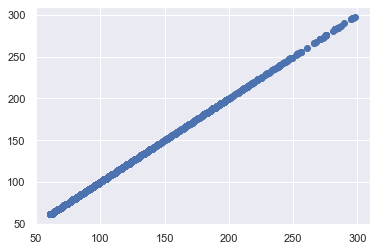

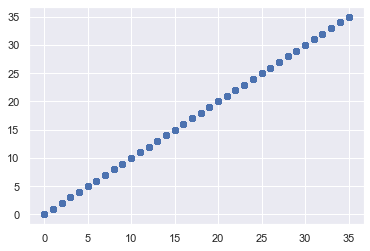

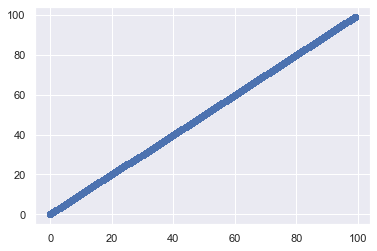

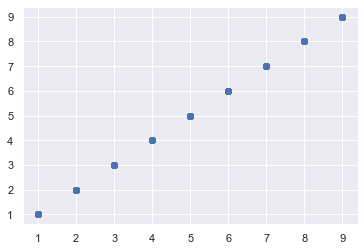

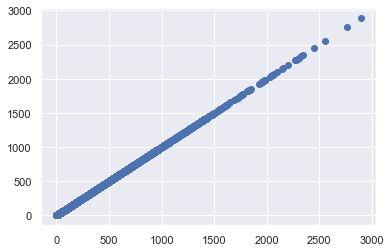

In [149]:
for val in numeric_data.columns:
    plt.scatter(x = numeric_data[val], y = numeric_data[val])
    plt.show()

In [150]:
numeric_data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,9.000000,2893.239678


In [151]:
iqr = np.percentile(numeric_data['monthly_premium_auto'],75) - np.percentile(numeric_data['monthly_premium_auto'],25)
upper_limit = np.percentile(numeric_data['monthly_premium_auto'],75) + 1.5*iqr
lower_limit = np.percentile(numeric_data['monthly_premium_auto'],25) - 1.5*iqr

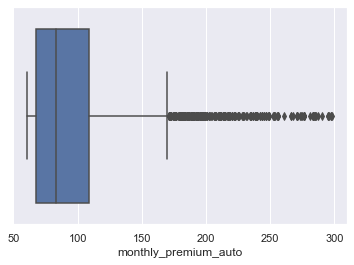

In [152]:
#check boxplot after removing outliers
sns.boxplot(x = numeric_data['monthly_premium_auto'])
plt.show()

## Lab 4.03 Feature extraction

1. Open the categoricals variable we created before.
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

In [153]:
#categoricals = data.select_dtypes(np.object)
#categoricals.head()

In [154]:
categorical_data.dtypes

customer                             object
state                                object
response                             object
coverage                             object
education                            object
effective_to_date            datetime64[ns]
employmentstatus                     object
gender                               object
location_code                        object
marital_status                       object
policy_type                          object
policy                               object
renew_offer_type                     object
sales_channel                        object
vehicle_class                        object
vehicle_size                         object
number_of_open_complaints            object
dtype: object

In [155]:
categorical_data['state'].iloc[0]

'Washington'

In [156]:
categorical_data.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,number_of_open_complaints
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0


In [157]:
def df_bar(df):
    sns.set(rc={'figure.figsize':(8,8)})

    for i, col in enumerate(df):
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())    
        plt.show()

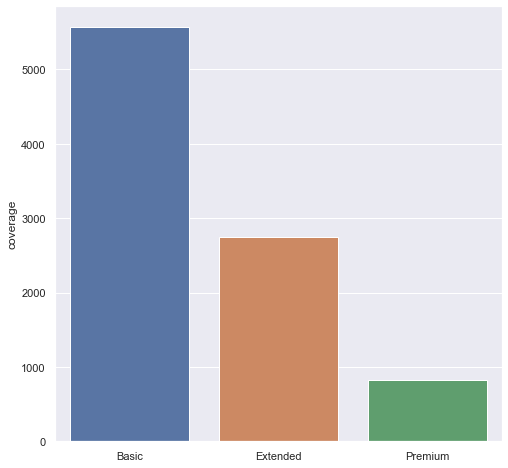

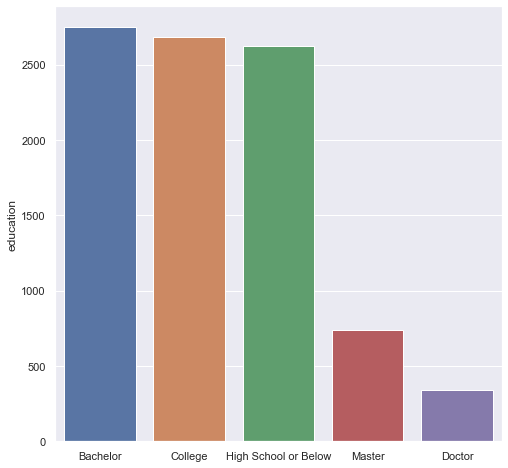

In [158]:
df_bar(categorical_data[['coverage', 'education']])

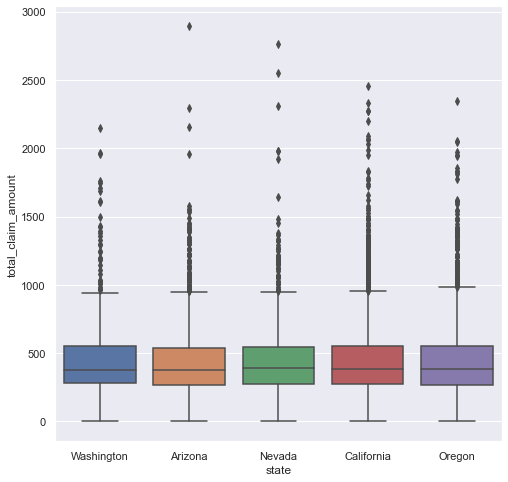

In [159]:
sns.boxplot(x = categorical_data['state'], y = numeric_data['total_claim_amount'])
plt.show()

# LAB 4.04 

In [160]:
# removing outliers with IQR

iqr = np.percentile(numeric_data['customer_lifetime_value'],75) - np.percentile(numeric_data['customer_lifetime_value'],25)
upper_limit = np.percentile(numeric_data['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(numeric_data['customer_lifetime_value'],25) - 1.5*iqr


numeric_data = numeric_data[(numeric_data['customer_lifetime_value']>lower_limit) & (numeric_data['customer_lifetime_value']<upper_limit)]




In [161]:
numeric_data.shape

(8317, 7)

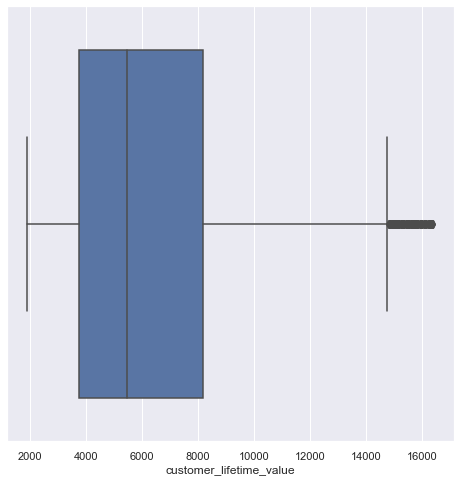

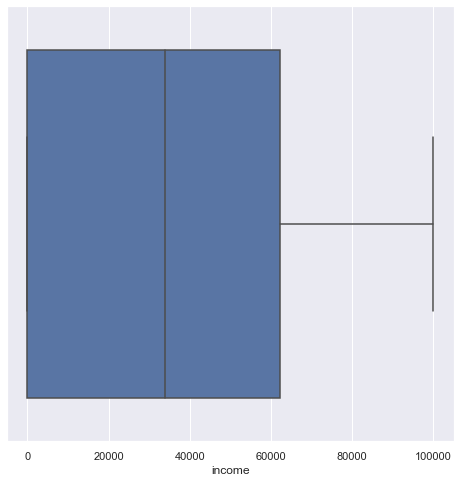

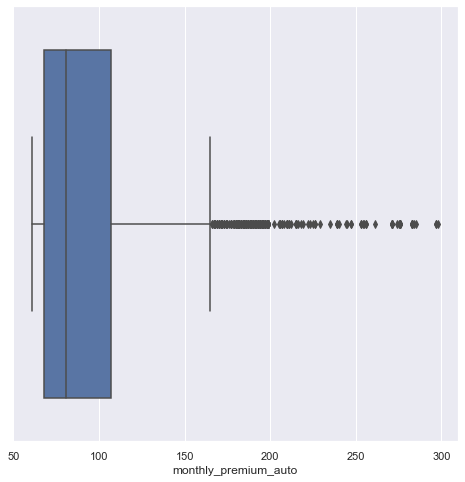

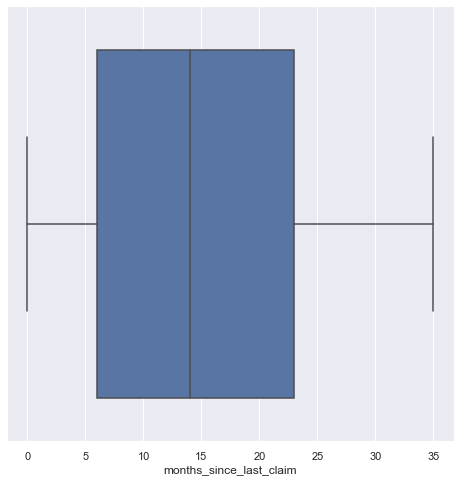

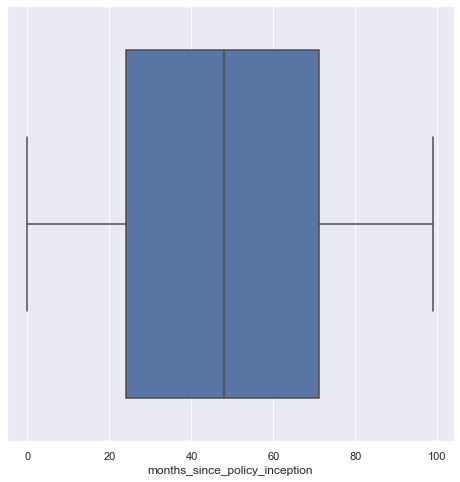

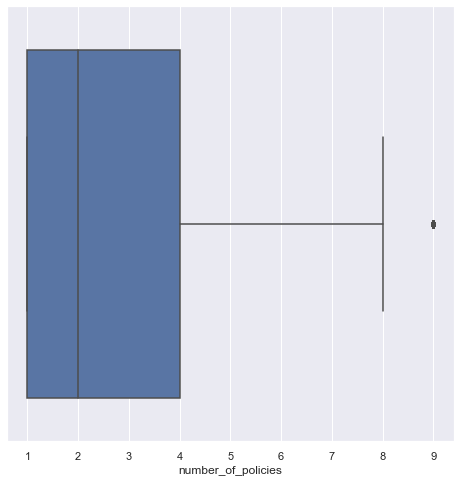

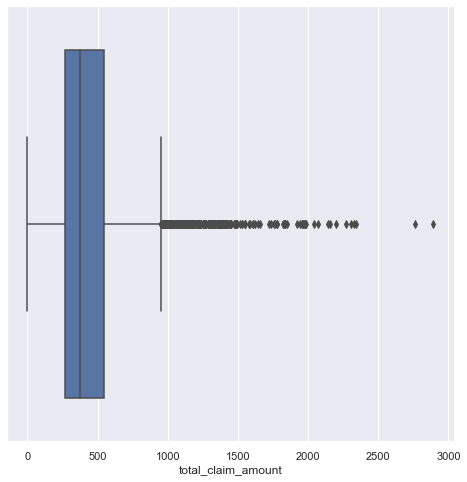

In [162]:
for val in numeric_data.columns:
    sns.boxplot(numeric_data[val])
    plt.show()

In [163]:
copy_numeric_data=numeric_data.copy

copy_numeric_data

<bound method NDFrame.copy of       customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9128              4100.398533   47761                   104   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                    

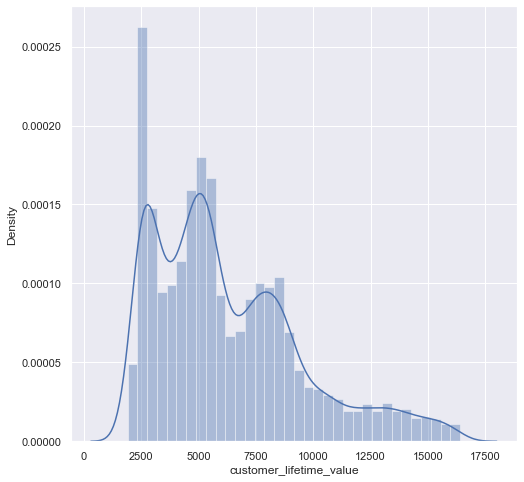

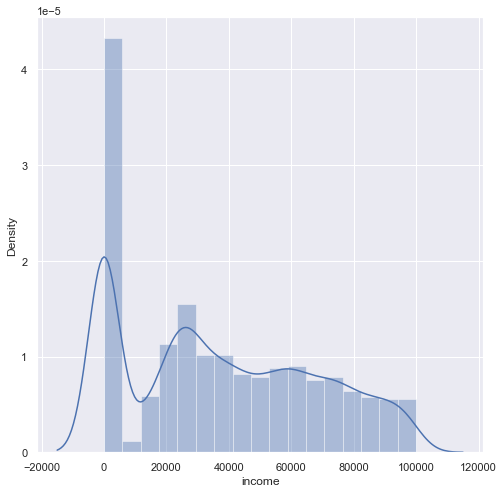

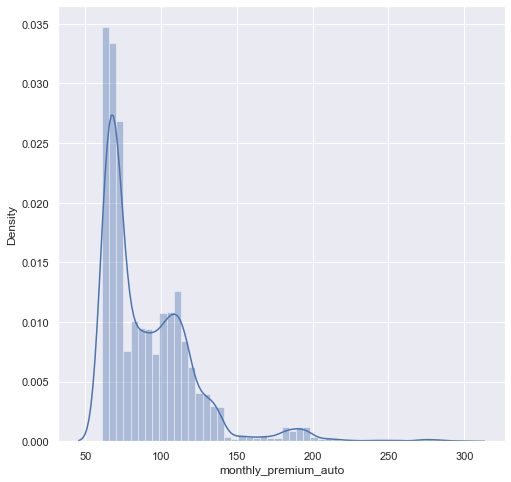

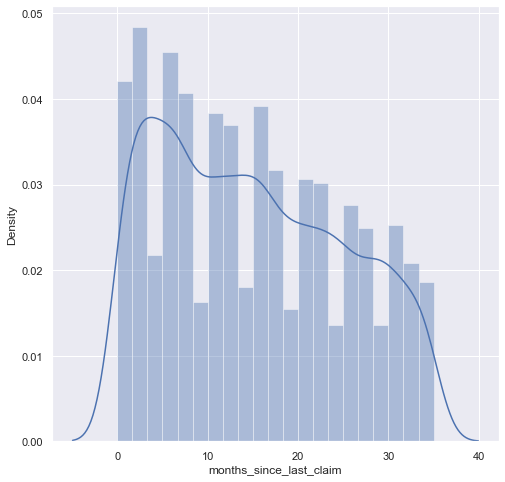

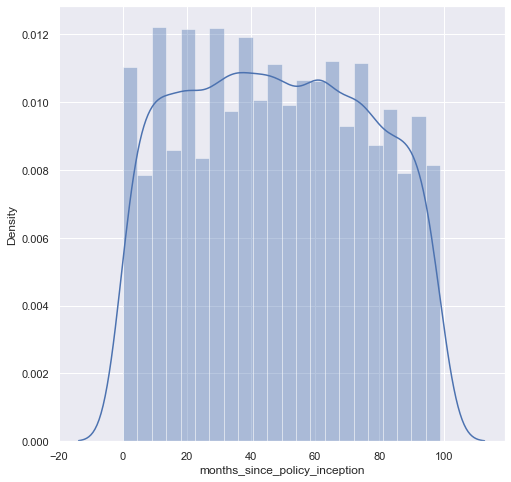

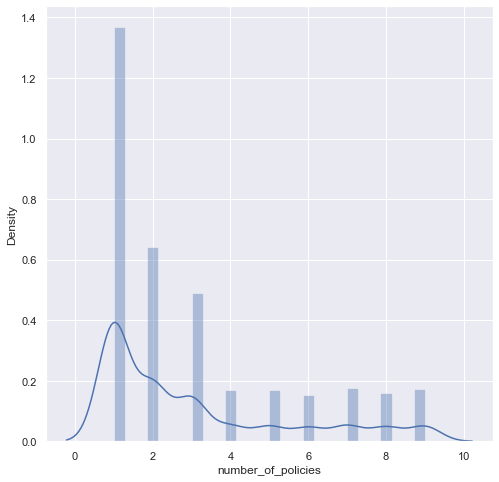

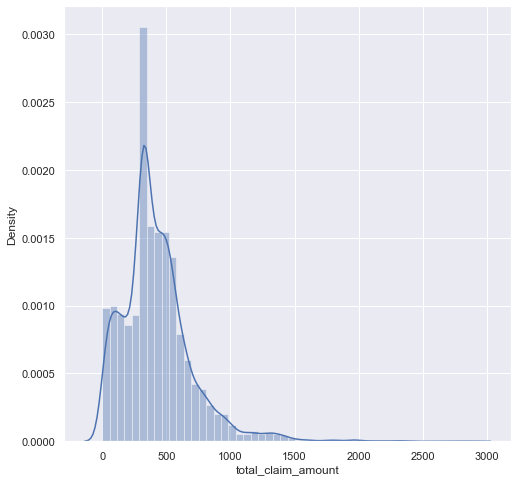

In [164]:
# Normalize the continuous variables. You can use any one method you want.

# distribution plots
for val in numeric_data.columns:
    sns.distplot(numeric_data[val])
    plt.show()
    

In [165]:
# Normalizing 

copy_numeric_data = numeric_data.select_dtypes(include=[np.number])


from sklearn.preprocessing import StandardScaler


def Standard_func(data): 
    transformer = StandardScaler().fit(data)
    x_standardized = transformer.transform(data)
    return x_standardized

print(Standard_func(copy_numeric_data))


[[-1.08500227  0.61273838 -0.70701355 ... -1.54245439 -0.82481611
  -0.13868698]
 [ 0.21614443 -1.23755793  0.09825496 ... -0.2171717   2.00822042
   2.56993744]
 [ 2.03943873  0.36590726  0.54920532 ... -0.3604455  -0.42009661
   0.52032219]
 ...
 [ 0.58165983 -1.23755793 -0.19164171 ... -0.39626395 -0.42009661
   1.33405804]
 [ 0.38431344 -0.51613504  0.16267644 ... -1.61409129 -0.0153771
   0.97279513]
 [-1.13181448 -1.23755793 -0.44932763 ...  1.50211395 -0.82481611
  -0.19386822]]


In [166]:
# The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as 
# integers might be useful.


categorical_date=categorical_data['effective_to_date']

categorical_data=categorical_data.drop(['effective_to_date'], axis=1)

categorical_date=pd.DataFrame(categorical_date, columns=['effective_to_date'])


In [169]:
categorical_date.head()

,effective_to_date
0,2011-02-24
1,2011-01-31
2,2011-02-19
3,2011-01-20
4,2011-02-03


In [170]:

categorical_date.columns

categorical_date['day'] = categorical_date['effective_to_date'][0].day
categorical_date['month'] = categorical_date['effective_to_date'][0].month
categorical_date['year'] = categorical_date['effective_to_date'][0].year

In [187]:
categorical_data.coverage.unique()

categorical_data.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size',
       'number_of_open_complaints'],
      dtype='object')

In [201]:
categorical_data_hot=pd.DataFrame(categorical_data, columns=['state','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class'])
# categorical_data_ordinal=pd.DataFrame(categorical_data-categorical_data_hot)

#categorical_data_ordinal=pd.DataFrame(categorical_data, columns=['coverage','employmentstatus','location_code','vehicle_size'])


SyntaxError: invalid syntax (<ipython-input-201-964bfda322cb>, line 2)

In [211]:
def my_difference(categorical_data,categorical_data_hot):
        categorical_data_ordinal = []
        for item in categorical_data:
            if item not in categorical_data_hot:
        categorical_data_ordinal.append(item)

IndentationError: expected an indented block (<ipython-input-211-d815a5c451f7>, line 5)

In [198]:
# Encode the categorical variables

#categorical_data=categorical_data.drop('customer', axis=1)


# One hot to state


from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categorical_data_hot)
encoded = encoder.transform(categorical_data_hot)
encoded
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size



print(encoded)

  (0, 3)	1.0
  (0, 4)	1.0
  (0, 9)	1.0
  (0, 26)	1.0
  (1, 5)	1.0
  (1, 6)	1.0
  (1, 12)	1.0
  (1, 17)	1.0
  (2, 1)	1.0
  (2, 4)	1.0
  (2, 6)	1.0
  (2, 12)	1.0
  (2, 26)	1.0
  (3, 0)	1.0
  (3, 4)	1.0
  (3, 8)	1.0
  (3, 20)	1.0
  (3, 24)	1.0
  (4, 3)	1.0
  (4, 5)	1.0
  (4, 6)	1.0
  (4, 10)	1.0
  (5, 2)	1.0
  (5, 4)	1.0
  (5, 6)	1.0
  :	:
  (9129, 0)	1.0
  (9129, 4)	1.0
  (9129, 6)	1.0
  (9129, 10)	1.0
  (9129, 16)	1.0
  (9129, 21)	1.0
  (9130, 0)	1.0
  (9130, 9)	1.0
  (9130, 19)	1.0
  (9131, 0)	1.0
  (9131, 5)	1.0
  (9131, 8)	1.0
  (9131, 19)	1.0
  (9132, 0)	1.0
  (9132, 4)	1.0
  (9132, 6)	1.0
  (9132, 11)	1.0
  (9132, 17)	1.0
  (9132, 19)	1.0
  (9133, 0)	1.0
  (9133, 5)	1.0
  (9133, 9)	1.0
  (9133, 18)	1.0
  (9133, 20)	1.0
  (9133, 26)	1.0


In [ ]:
categorical_data["coverage"] = categorical_data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
